In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import healpy as hp
from lsst.sims.utils import calcLmstLast, Site

In [2]:
names = ['hpid', 'mag', 'airmass', 'mjd', 'filter']
types = [int,float,float,float,'|S1']
data = np.loadtxt('xy2sky.txt', dtype=zip(names,types))
site = Site('LSST')

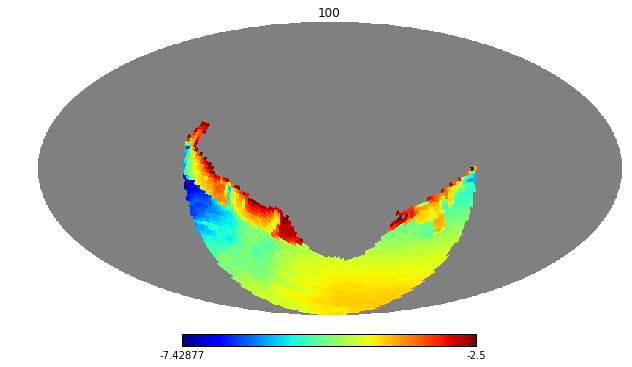

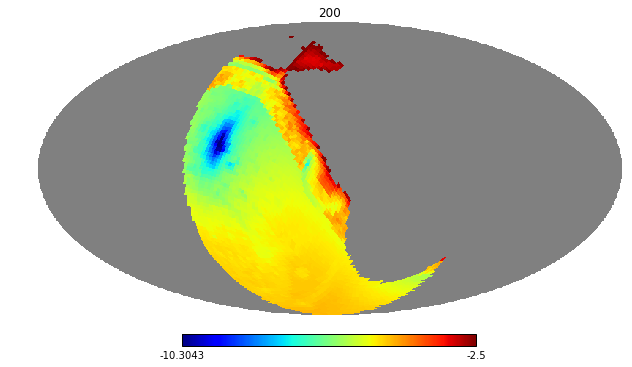

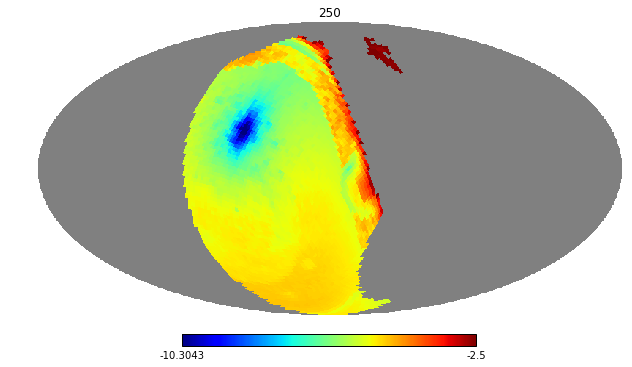

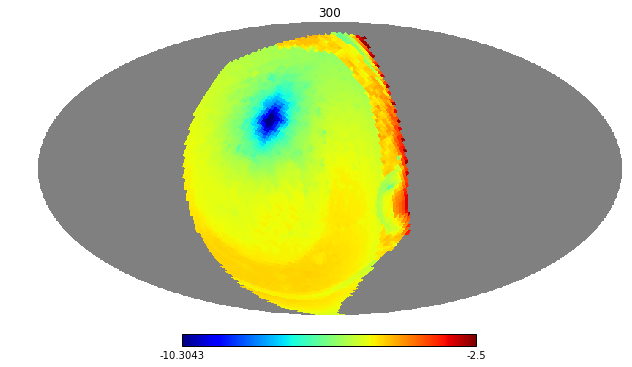

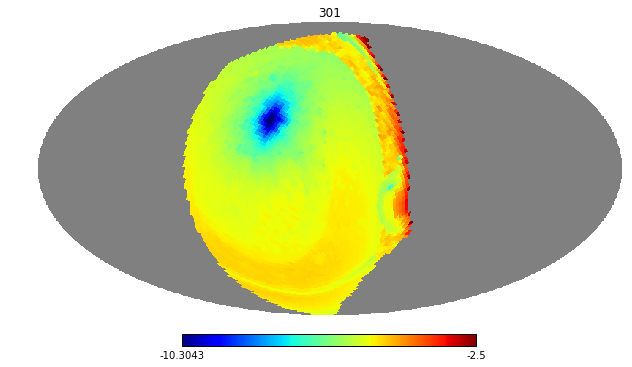

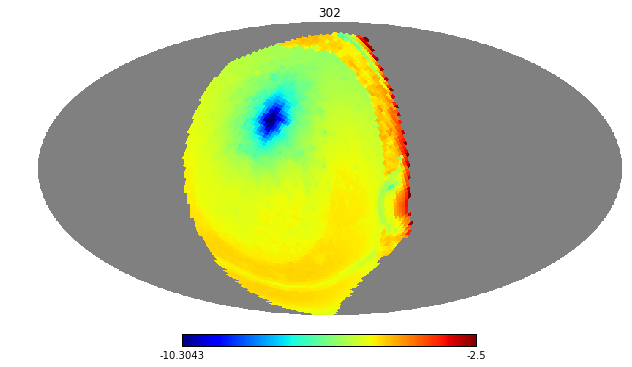

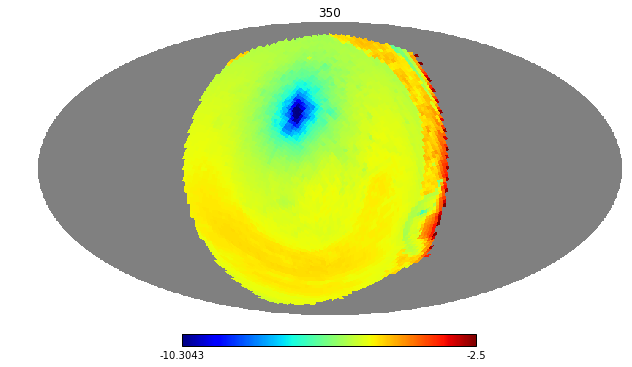

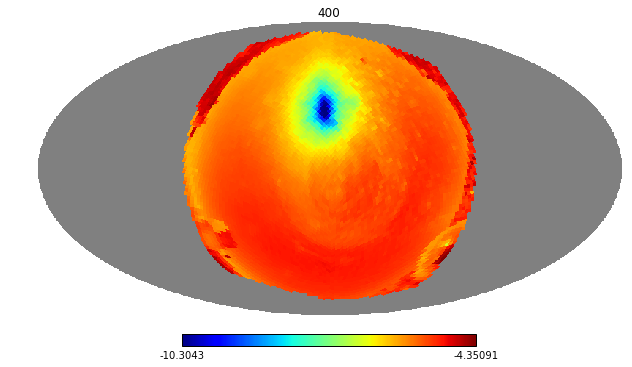

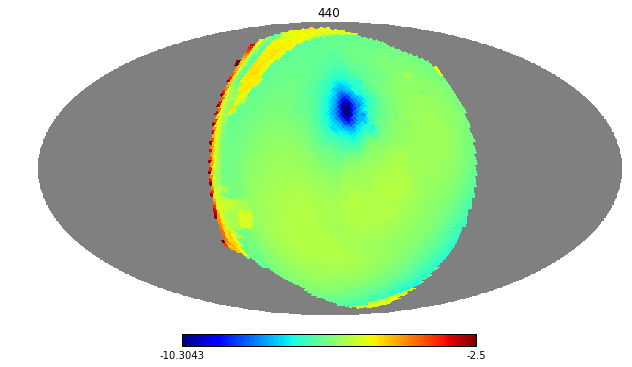

In [3]:
umjd = np.unique(data['mjd'])
nside = 32

for i in [100,200, 250,300, 301,302, 350, 400, 440]:
    skymap = np.zeros(hp.nside2npix(nside))+hp.UNSEEN
    good = np.where(data['mjd'] == umjd[i])
    lmst,last = calcLmstLast(umjd[i], site.longitude_rad)
    lmst = lmst*180/12.
    skymap[data['hpid'][good]] = data['mag'][good]
    hp.mollview(skymap, rot=(lmst,site.latitude,0), title=str(i))

In [4]:
help(hp.mollview)

Help on function mollview in module healpy.visufunc:

mollview(map=None, fig=None, rot=None, coord=None, unit='', xsize=800, title='Mollweide view', nest=False, min=None, max=None, flip='astro', remove_dip=False, remove_mono=False, gal_cut=0, format='%g', format2='%g', cbar=True, cmap=None, notext=False, norm=None, hold=False, margins=None, sub=None, return_projected_map=False)
    Plot an healpix map (given as an array) in Mollweide projection.
    
    Parameters
    ----------
    map : float, array-like or None
      An array containing the map, supports masked maps, see the `ma` function.
      If None, will display a blank map, useful for overplotting.
    fig : int or None, optional
      The figure number to use. Default: create a new figure
    rot : scalar or sequence, optional
      Describe the rotation to apply.
      In the form (lon, lat, psi) (unit: degrees) : the point at
      longitude *lon* and latitude *lat* will be at the center. An additional rotation
      of an